# Get get in touch with generative coding 
Insipred by an Online lab Night (https://youtu.be/bq_y7gggolE) on generative art I want to give generative computing a try.

## Collection of python snippets 
https://www.generativehut.com/post/robots-and-generative-art-and-python-oh-my


## GitHub repository
There is git repository with all the things you need.
https://github.com/zoso95/plotter_guides/tree/master/genhut

## Implementation

### imports


In [1]:
import numpy as np;
import matplotlib.pyplot as plt;

### rect.py
This is used to define the paper size.

In [2]:
x_bounds = np.array([0, 13])
y_bounds = np.array([0, 16])

x_buffer, y_buffer = 1, 1

x_plot = x_bounds + np.array([x_buffer, -x_buffer])
y_plot = y_bounds + np.array([y_buffer, -y_buffer])

### seed.py
This is used to render random points to the paper

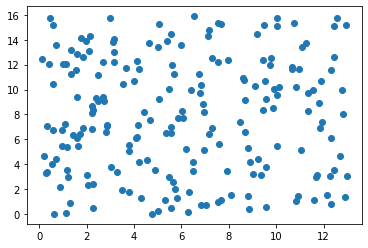

In [3]:
num_points = 200
x = np.random.uniform(*x_bounds, size=num_points).reshape((num_points, 1))
y = np.random.uniform(*y_bounds, size=num_points).reshape((num_points, 1))
pts = np.hstack([x, y])
plt.scatter(*pts.transpose())

### voronoi.py
This is used to connect the poins with lines to build polygons.

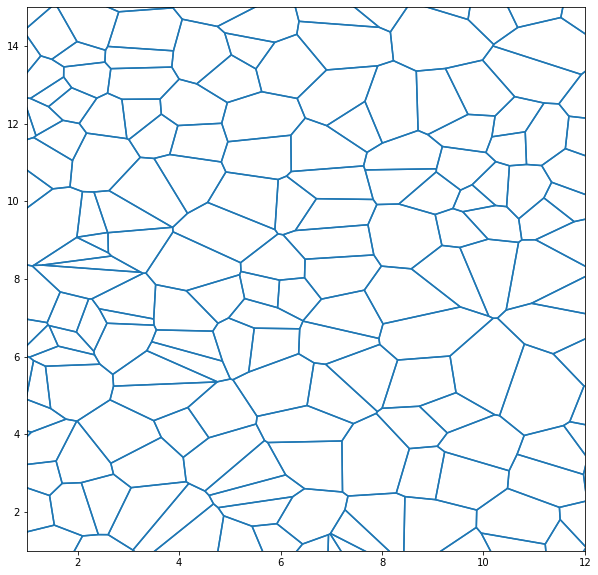

In [4]:
from scipy.spatial import Voronoi;
from matplotlib.collections import LineCollection;

vor = Voronoi(pts)
verts = vor.vertices
shapes_ind = vor.regions

"""
We are doing three things here
1. filtering out any empty shapes (len(s) == 0)
2. filtering out any shapes that go out of bounds (then it has an index of -1)
3. Closing the polygon by adding the last point back (so [1,2,3]->[1,2,3,1])
"""
shapes_ind = [s+s[0:1] for s in shapes_ind if len(s)>0 and -1 not in s]
shapes = [verts[s] for s in shapes_ind]

# Plot the Diagram

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(*x_plot)
ax.set_ylim(*y_plot)
lc = LineCollection(shapes)
ax.add_collection(lc)

### fill.py
This is used to fill  polgon with a scaled number of copies of itself.

[5.74630352 2.51475533]


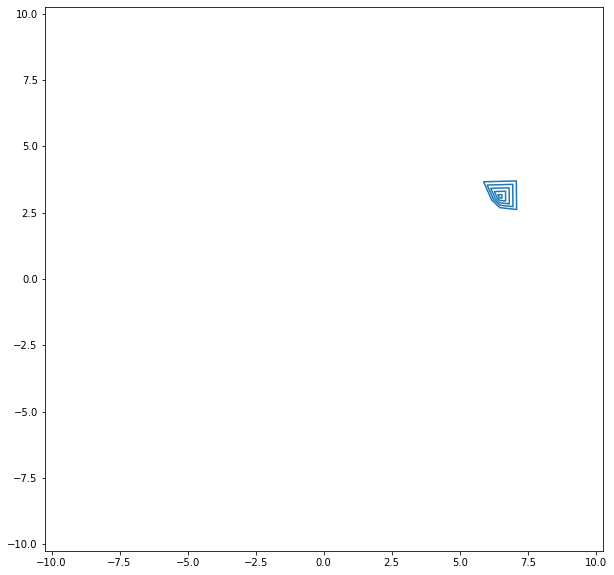

In [5]:
# let's just look at one polygon
polygon_ind = 15
polygon = shapes[polygon_ind]
center = np.mean(polygon, axis=0)

rescaled = []
n_fill_lines = 5
min_scalar = 0.1 # scale it down to 1/10th the original size

for scaler in np.linspace(min_scalar, 1, num=n_fill_lines, endpoint=False):
    scaled = scaler*(polygon - center) + center
    rescaled.append(scaled)
    
    
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(-10.25, 10.25)
ax.set_ylim(-10.25, 10.25)
lc = LineCollection(rescaled)
ax.add_collection(lc)

print(np.min(polygon, axis=0))

### Make some art
This is used to combine things together.

In [6]:
def make_some_art(num_points=200, percent_to_fill = 0.5, n_fill_lines=5, min_scalar = 0.1,  debug=False, toggle_for_new=False):
    
    x = np.random.uniform(*x_bounds, size=num_points).reshape((num_points, 1))
    y = np.random.uniform(*y_bounds, size=num_points).reshape((num_points, 1))
    pts = np.hstack([x, y])
    
    vor = Voronoi(pts)
    verts = vor.vertices
    shapes_ind = vor.regions
    
    shapes_ind = [s+s[0:1] for s in shapes_ind if len(s)>0 and -1 not in s]
    shapes = [verts[s] for s in shapes_ind]
    
    n_shapes_to_fill = int(percent_to_fill*len(shapes))
    shapes_to_fill = np.random.choice(shapes, size=n_shapes_to_fill, replace=False)
    
    fill = []
    
    for s in shapes_to_fill:
        center = np.mean(s, axis=0)
        for scaler in np.linspace(min_scalar, 1, num=n_fill_lines, endpoint=False):
            scaled = scaler*(s - center) + center
            fill.append(scaled)

    
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal')
    
    if not debug:
        plt.grid(False)
        plt.axis('off')

    
    ax.set_xlim(*x_plot)
    ax.set_ylim(*y_plot)
    lc = LineCollection(shapes+fill)
    ax.add_collection(lc)
  
    return fig, ax

Default values


<ipython-input-6-b61be3ac198a>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  shapes_to_fill = np.random.choice(shapes, size=n_shapes_to_fill, replace=False)


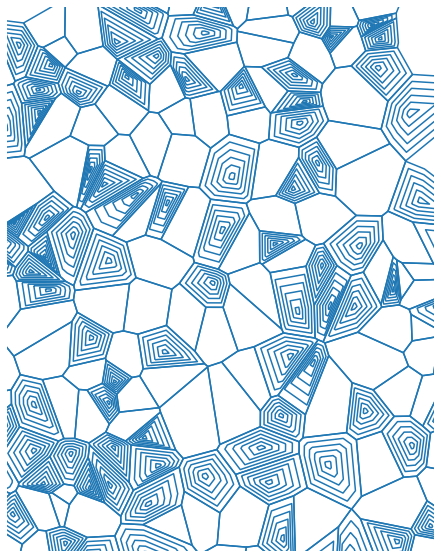

In [9]:
print("Default values")
art = make_some_art()
plt.savefig("someart.png")

In [ ]:
print("Some values")
make_some_art(144, 0.91, 1, 0.5)

In [ ]:
print("Some base 2 values")
make_some_art(138, 0.69314, 2, 0.69314)

In [ ]:
print("Some minimal values")
make_some_art(99, 0.9, 9, 0.9)

In [ ]:
print("Some more values")
make_some_art(193, 0.87, 4, 0.21)